#Data analysis project:
Use an online available dataset from Kaggle and prepare the data, and perform exploratory data analysis on it. Also formulate and answer several questions about the data set.

Preparing:
-For preparing the dataset I changed the column names from incoherent names such as x1,x2,...,x55, to coherent names such as "Meal cost for inexpensive meal (USD)".
-I also changed the currency of all the data from USD to EUR, since we use the Euro.

Exploratory Analsysis:
-I investigated the mean, max, range, std of the data set
-I counted the number of quality data entries
-I plotted several interesting data combination. This included using grouping and created new columns.

Questions:
I answered the following questions,
-In what fraction of cities is it reasonably affordable to live in the city centre?
-In whats cities is it the cheapest to eat out for local residents?

#Set-up
Install opendatasets and import relevant modules

In [1]:
pip install opendatasets --upgrade


In [2]:
import opendatasets as od
import pandas as pd
import os

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/mvieira101/global-cost-of-living'
od.download('https://www.kaggle.com/datasets/mvieira101/global-cost-of-living')

Skipping, found downloaded files in "./global-cost-of-living" (use force=True to force download)


In [4]:
data_dir = "./global-cost-of-living"

#Import the data from the saved CSV's


In [5]:
living_cost1_df = pd.read_csv(data_dir+"/"+os.listdir(data_dir)[0])
living_cost2_df = pd.read_csv(data_dir+"/"+os.listdir(data_dir)[1])

#Data Preperation and cleaning

##Changing column names

The column names are named x1-x55, we want them to be word descriptions of what they represent. We do this by formatting the column_descriptions into an array and changing the column names using it.

In [6]:
import re
import numpy as np

In [7]:
column_descriptions = """city	Name of the city
country	Name of the country
x1	Meal, Inexpensive Restaurant (USD)
x2	Meal for 2 People, Mid-range Restaurant, Three-course (USD)
x3	McMeal at McDonalds (or Equivalent Combo Meal) (USD)
x4	Domestic Beer (0.5 liter draught, in restaurants) (USD)
x5	Imported Beer (0.33 liter bottle, in restaurants) (USD)
x6	Cappuccino (regular, in restaurants) (USD)
x7	Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)
x8	Water (0.33 liter bottle, in restaurants) (USD)
x9	Milk (regular), (1 liter) (USD)
x10	Loaf of Fresh White Bread (500g) (USD)
x11	Rice (white), (1kg) (USD)
x12	Eggs (regular) (12) (USD)
x13	Local Cheese (1kg) (USD)
x14	Chicken Fillets (1kg) (USD)
x15	Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)
x16	Apples (1kg) (USD)
x17	Banana (1kg) (USD)
x18	Oranges (1kg) (USD)
x19	Tomato (1kg) (USD)
x20	Potato (1kg) (USD)
x21	Onion (1kg) (USD)
x22	Lettuce (1 head) (USD)
x23	Water (1.5 liter bottle, at the market) (USD)
x24	Bottle of Wine (Mid-Range, at the market) (USD)
x25	Domestic Beer (0.5 liter bottle, at the market) (USD)
x26	Imported Beer (0.33 liter bottle, at the market) (USD)
x27	Cigarettes 20 Pack (Marlboro) (USD)
x28	One-way Ticket (Local Transport) (USD)
x29	Monthly Pass (Regular Price) (USD)
x30	Taxi Start (Normal Tariff) (USD)
x31	Taxi 1km (Normal Tariff) (USD)
x32	Taxi 1hour Waiting (Normal Tariff) (USD)
x33	Gasoline (1 liter) (USD)
x34	Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)
x35	Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)
x36	Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
x37	1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)
x38	Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)
x39	Fitness Club, Monthly Fee for 1 Adult (USD)
x40	Tennis Court Rent (1 Hour on Weekend) (USD)
x41	Cinema, International Release, 1 Seat (USD)
x42	Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)
x43	International Primary School, Yearly for 1 Child (USD)
x44	1 Pair of Jeans (Levis 501 Or Similar) (USD)
x45	1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)
x46	1 Pair of Nike Running Shoes (Mid-Range) (USD)
x47	1 Pair of Men Leather Business Shoes (USD)
x48	Apartment (1 bedroom) in City Centre (USD)
x49	Apartment (1 bedroom) Outside of Centre (USD)
x50	Apartment (3 bedrooms) in City Centre (USD)
x51	Apartment (3 bedrooms) Outside of Centre (USD)
x52	Price per Square Meter to Buy Apartment in City Centre (USD)
x53	Price per Square Meter to Buy Apartment Outside of Centre (USD)
x54	Average Monthly Net Salary (After Tax) (USD)
x55	Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate
data_quality	0 if Numbeo considers that more contributors are needed to increase data quality, else 1"""

Find all strings that start with "number\t" and exclude that from that string:
This finds all column lines except "city", "country" and "data_quality".

In [8]:
column_descriptions_series = re.findall("(?<=[0-9]\\t).*", column_descriptions)

In [9]:
living_cost2_df.columns = np.concatenate((['City','Country'],column_descriptions_series,['Data_quality']))

In [10]:
living_cost2_df.head()

,City,Country,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)","Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)","Water (0.33 liter bottle, in restaurants) (USD)",...,1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


##Convert all prices to EUR
Since we are Europeans we want all the price in Euro's. So we will convert all the prices into Euro's using current conversion rates.

###Currenty coversion rate scraper:
Obtained scraper code from: https://thepythoncode.com/article/make-a-currency-converter-in-python.


In [11]:
pip install python-dateutil requests bs4 yahoo_fin

In [12]:
import requests
from bs4 import BeautifulSoup as bs
from dateutil.parser import parse
from pprint import pprint

In [13]:
def get_exchange_list_xrates(currency, amount=1):
    # make the request to x-rates.com to get current exchange rates for common currencies
    content = requests.get(f"https://www.x-rates.com/table/?from={currency}&amount={amount}").content
    # initialize beautifulsoup
    soup = bs(content, "html.parser")
    # get the last updated time
    price_datetime = parse(soup.find_all("span", attrs={"class": "ratesTimestamp"})[1].text)
    # get the exchange rates tables
    exchange_tables = soup.find_all("table")
    exchange_rates = {}
    for exchange_table in exchange_tables:
        for tr in exchange_table.find_all("tr"):
            # for each row in the table
            tds = tr.find_all("td")
            if tds:
                currency = tds[0].text
                # get the exchange rate
                exchange_rate = float(tds[1].text)
                exchange_rates[currency] = exchange_rate
    return price_datetime, exchange_rates

###Multiply all the USD values in the df by the exchange rate and change column names to EUR

In [14]:
living_cost2_df.loc[:,'Meal, Inexpensive Restaurant (USD)':'Average Monthly Net Salary (After Tax) (USD)'] *= get_exchange_list_xrates("USD")[1]['Euro']

In [15]:
living_cost2_df.columns = living_cost2_df.columns.str.replace("USD", "EUR", regex=True)


In [16]:
living_cost2_df.head()

,City,Country,"Meal, Inexpensive Restaurant (EUR)","Meal for 2 People, Mid-range Restaurant, Three-course (EUR)",McMeal at McDonalds (or Equivalent Combo Meal) (EUR),"Domestic Beer (0.5 liter draught, in restaurants) (EUR)","Imported Beer (0.33 liter bottle, in restaurants) (EUR)","Cappuccino (regular, in restaurants) (EUR)","Coke/Pepsi (0.33 liter bottle, in restaurants) (EUR)","Water (0.33 liter bottle, in restaurants) (EUR)",...,1 Pair of Men Leather Business Shoes (EUR),Apartment (1 bedroom) in City Centre (EUR),Apartment (1 bedroom) Outside of Centre (EUR),Apartment (3 bedrooms) in City Centre (EUR),Apartment (3 bedrooms) Outside of Centre (EUR),Price per Square Meter to Buy Apartment in City Centre (EUR),Price per Square Meter to Buy Apartment Outside of Centre (EUR),Average Monthly Net Salary (After Tax) (EUR),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Data_quality
0,Seoul,South Korea,6.902162,48.333108,5.527122,2.759067,4.484608,3.531966,1.330104,0.709988,...,99.182629,667.334806,501.053817,2398.788857,1555.754487,19832.661276,9860.654996,2417.212597,3.47,1
1,Shanghai,China,5.113711,35.822939,5.113711,1.024540,3.837530,3.576902,0.476321,0.296577,...,111.000784,981.338238,512.161984,2653.647591,1403.430603,15948.766233,8462.652656,1276.064147,5.03,1
2,Guangzhou,China,3.711709,25.586530,4.475621,0.763911,1.536809,3.181465,0.395436,0.296577,...,39.444777,479.268868,285.298347,1116.424691,618.363608,11587.022298,4877.752437,1088.959838,5.19,1
3,Mumbai,India,3.307286,16.554404,3.307286,2.210849,3.864492,2.228823,0.431385,0.170757,...,37.000261,469.490806,264.268322,1268.200355,628.923556,5475.400572,2496.201010,575.908122,7.96,1
4,Delhi,India,4.412710,19.870677,3.864492,1.653643,3.307286,1.590733,0.440372,0.170757,...,32.803244,206.561575,121.605668,540.148093,295.813359,2252.845879,931.737936,527.062745,8.06,1


##Include a column for Apartment (1 bedroom) in City Centre as a percentage of Net Salary:

In [17]:
living_cost2_df['Apartment in City Centre / Net Salary (%)'] = living_cost2_df['Apartment (1 bedroom) in City Centre (EUR)']/living_cost2_df['Average Monthly Net Salary (After Tax) (EUR)']*100

#Data exploration

In [18]:
living_cost2_df.describe()

,"Meal, Inexpensive Restaurant (EUR)","Meal for 2 People, Mid-range Restaurant, Three-course (EUR)",McMeal at McDonalds (or Equivalent Combo Meal) (EUR),"Domestic Beer (0.5 liter draught, in restaurants) (EUR)","Imported Beer (0.33 liter bottle, in restaurants) (EUR)","Cappuccino (regular, in restaurants) (EUR)","Coke/Pepsi (0.33 liter bottle, in restaurants) (EUR)","Water (0.33 liter bottle, in restaurants) (EUR)","Milk (regular), (1 liter) (EUR)",Loaf of Fresh White Bread (500g) (EUR),...,Apartment (1 bedroom) in City Centre (EUR),Apartment (1 bedroom) Outside of Centre (EUR),Apartment (3 bedrooms) in City Centre (EUR),Apartment (3 bedrooms) Outside of Centre (EUR),Price per Square Meter to Buy Apartment in City Centre (EUR),Price per Square Meter to Buy Apartment Outside of Centre (EUR),Average Monthly Net Salary (After Tax) (EUR),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Data_quality,Apartment in City Centre / Net Salary (%)
count,4528.000000,4505.000000,4622.000000,4460.000000,4516.000000,4612.000000,4511.000000,4640.000000,4578.000000,4543.000000,...,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000,3124.000000
mean,9.298780,38.966489,6.227850,3.037467,3.543168,2.475928,1.369533,1.006389,1.032227,1.449503,...,639.505921,503.426397,1126.978271,875.426769,2907.599386,2104.739776,1636.734735,6.518030,0.186239,52.993733
std,6.432184,22.942779,2.430527,1.892664,1.887441,1.221198,0.815160,0.678764,0.464805,0.978853,...,583.151170,474.067390,1095.893722,828.017919,5624.896094,3208.987521,1466.229115,5.413828,0.389339,76.822309
min,0.404424,2.920837,0.970617,0.296577,0.278603,0.197718,0.098859,0.062910,0.233667,0.044936,...,19.502202,10.964372,55.280206,24.373259,99.766796,44.252924,16.176942,0.780000,0.000000,3.245202
25%,3.873479,20.167254,4.475621,1.437950,1.977182,1.419976,0.692014,0.431385,0.745937,0.701001,...,230.287757,153.725885,418.084079,292.721765,1006.664139,710.266613,430.468427,3.000000,0.000000,29.603942
50%,8.627702,35.948760,6.282046,2.696157,3.316273,2.363631,1.330104,0.943655,0.939161,1.186309,...,473.508080,363.028553,827.787603,640.633865,1894.041305,1420.533226,1160.102434,5.200000,0.000000,40.000233
75%,13.480785,53.923140,7.639112,4.493595,4.736249,3.388171,1.896297,1.419976,1.186309,1.977182,...,892.077467,710.266613,1537.011702,1231.128197,3454.118630,2514.840442,2490.220035,8.330000,0.000000,56.561107
max,51.352804,192.047263,19.888651,18.513611,15.727583,8.987190,7.189752,5.257506,6.120276,7.926702,...,11331.795089,8078.917617,24622.545956,16058.472861,216558.628539,72186.206517,11522.835787,61.330000,1.000000,2558.661905


How many of the cities have quality data?

In [19]:
living_cost2_df['Data_quality'].sum()

923

#Exploratory Plotting:
Plotting some interesting and relevant data to see how it behaves in the dataset.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

What does the distribution of Apartment Cost / Net Salary look like?

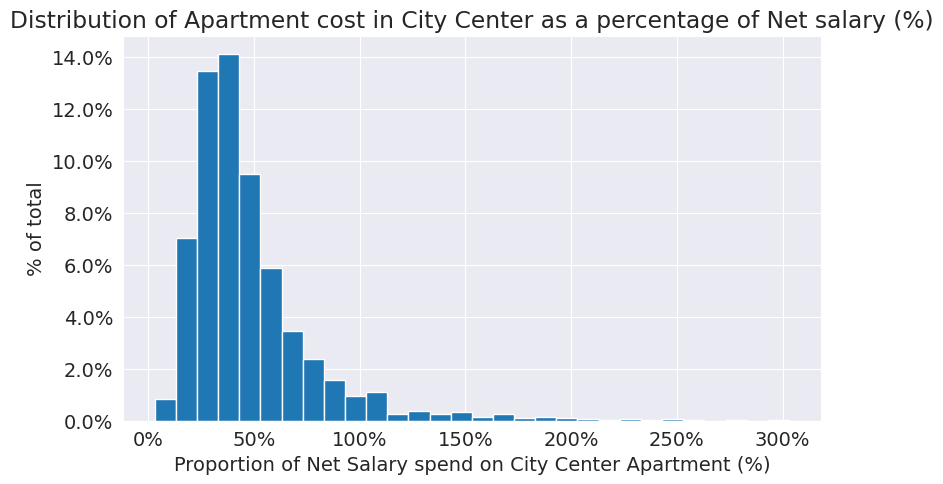

In [21]:
data = living_cost2_df['Apartment in City Centre / Net Salary (%)'];
binwidth = 10

plt.hist(data, weights=np.ones(len(data)) / len(data),  bins=range(int(min(data)), 300 + binwidth, binwidth));
plt.gca().yaxis.set_major_formatter(PercentFormatter(1));
plt.gca().xaxis.set_major_formatter(PercentFormatter(100));
plt.xlabel('Proportion of Net Salary spend on City Center Apartment (%)')
plt.ylabel('% of total')
plt.title('Distribution of Apartment cost in City Center as a percentage of Net salary (%)');

How are the price of an inexpensive meal and salary correlated per country?

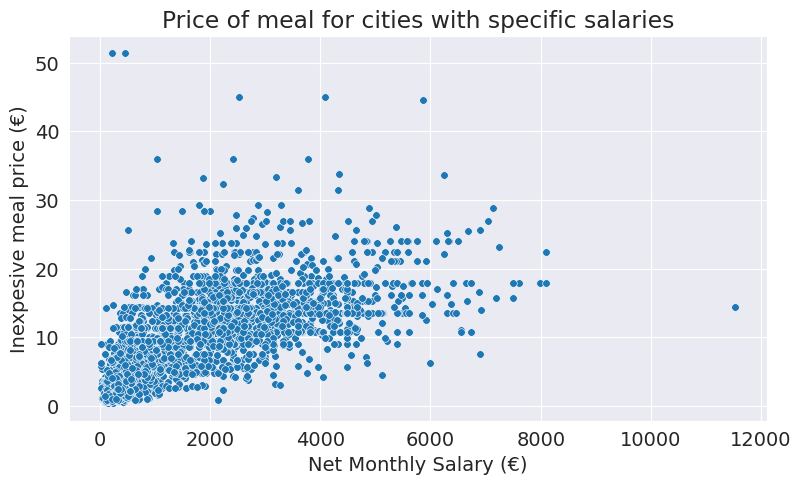

In [22]:



plt.title('Meal Price for Net salaries')
sns.scatterplot(x='Average Monthly Net Salary (After Tax) (EUR)',
                y='Meal, Inexpensive Restaurant (EUR)', s= 30,
                data=living_cost2_df);
plt.xlabel('Net Monthly Salary (€)')
plt.ylabel('Inexpesive meal price (€)')

plt.title("Price of meal for cities with specific salaries")
plt.show()

Bar Chart of the number of cities in each country:

In [23]:
city_count_head_df = living_cost2_df.groupby('Country').count().sort_values(by='City',ascending=False).head(20)

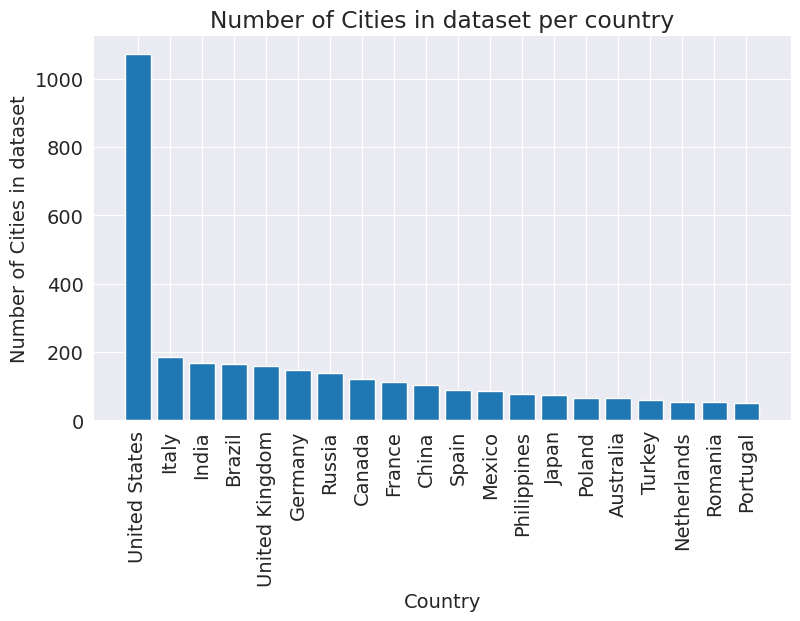

In [24]:
plt.bar(city_count_head_df.index,city_count_head_df['City']);
plt.xlabel('Country')
plt.ylabel('Number of Cities in dataset')
plt.xticks(rotation=90)
plt.title('Number of Cities in dataset per country');

#Questions


##In what fraction of cities can you afford to live in the city centre?
Let's assume that it is reasonable to pay up to 30% of your salary for rent. And not more.

In [25]:
payable_rent = len(living_cost2_df[living_cost2_df['Apartment in City Centre / Net Salary (%)'] <= 30])/len(living_cost2_df)*100
print(f'Rent is reasonable price in the city centre in only {payable_rent:.1f}% of cities')

Rent is reasonable price in the city centre in only 16.4% of cities


In the plot below we see the red line where the 30% cutoff is. Result in the mentioned above percentage being to the right of it.

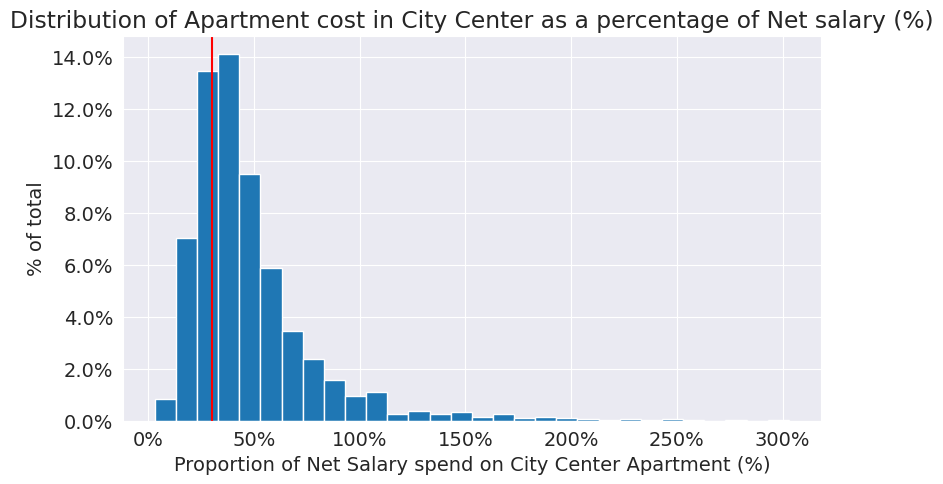

In [26]:
data = living_cost2_df['Apartment in City Centre / Net Salary (%)'];
binwidth = 10

plt.hist(data, weights=np.ones(len(data)) / len(data),  bins=range(int(min(data)), 300 + binwidth, binwidth));
plt.gca().yaxis.set_major_formatter(PercentFormatter(1));
plt.axvline(x=30,c='r')
plt.gca().xaxis.set_major_formatter(PercentFormatter(100));
plt.xlabel('Proportion of Net Salary spend on City Center Apartment (%)')
plt.ylabel('% of total')
plt.title('Distribution of Apartment cost in City Center as a percentage of Net salary (%)');

##Which cities are the cheapest to eat out compared to salary?

In [27]:
living_cost2_df['salary/meal cost'] = living_cost2_df['Average Monthly Net Salary (After Tax) (EUR)']/living_cost2_df['Meal, Inexpensive Restaurant (EUR)']

In [28]:
living_cost2_df.sort_values(by='salary/meal cost',ascending=False).head().loc[:,['City','salary/meal cost']]

,City,salary/meal cost
565,Vatican City,2268.057143
2898,Madinat Hamad,1131.498016
910,`Ajman,1067.673529
559,Funafuti,996.025281
1282,Al Mubarraz,968.658798


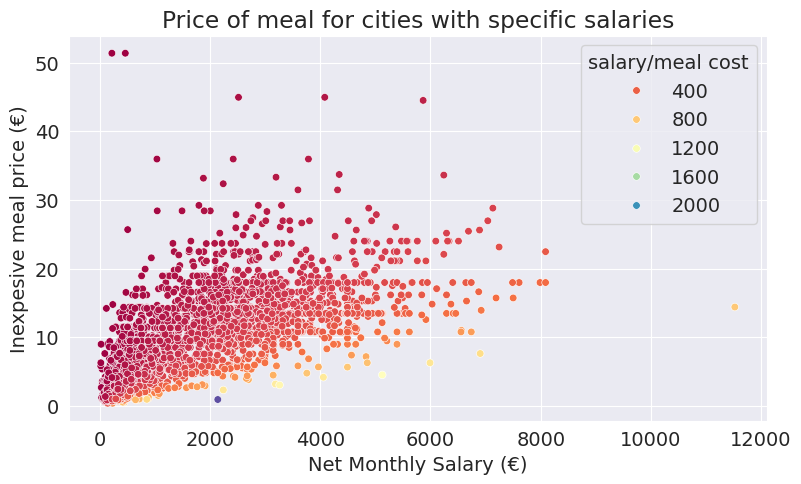

In [29]:
plt.title('Meal Price for Net salaries')
sns.color_palette("husl", 9)
sns.scatterplot(x='Average Monthly Net Salary (After Tax) (EUR)',
                y='Meal, Inexpensive Restaurant (EUR)', s= 30,
                data=living_cost2_df,hue='salary/meal cost',palette="Spectral");

plt.xlabel('Net Monthly Salary (€)')
plt.ylabel('Inexpesive meal price (€)')

plt.title("Price of meal for cities with specific salaries")
plt.show()